In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("dirtydata.csv")

In [3]:
df.head(2)

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0


In [4]:
X = df.drop('Calories', axis = 1)

In [5]:
X = X[['Duration', 'Pulse','Maxpulse']]

In [6]:
X.head(2500)

,Duration,Pulse,Maxpulse
0,60,110,130
1,60,117,145
2,60,103,135
3,45,109,175
4,45,117,148
5,60,102,127
6,60,110,136
7,450,104,134
8,30,109,133
9,60,98,124


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Duration  32 non-null     int64
 1   Pulse     32 non-null     int64
 2   Maxpulse  32 non-null     int64
dtypes: int64(3)
memory usage: 896.0 bytes


In [8]:
X.describe()

,Duration,Pulse,Maxpulse
count,32.000000,32.000000,32.000000
mean,68.437500,103.500000,128.500000
std,70.039591,7.832933,12.998759
min,30.000000,90.000000,101.000000
25%,60.000000,100.000000,120.000000
50%,60.000000,102.500000,127.500000
75%,60.000000,106.500000,132.250000
max,450.000000,130.000000,175.000000


In [9]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [10]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
len(kmeans.labels_), X.shape

(32, (32, 3))

In [12]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
kmeans.cluster_centers_[0]

array([ 56.12903226, 103.48387097, 128.32258065])

In [14]:
df.head(2)

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0


In [15]:
print(labels)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [16]:
X['cluster'] = labels

In [17]:
X.head()

,Duration,Pulse,Maxpulse,cluster
0,60,110,130,0
1,60,117,145,0
2,60,103,135,0
3,45,109,175,0
4,45,117,148,0


In [18]:
X.groupby('cluster').mean()

,Duration,Pulse,Maxpulse
cluster,,,
0,56.129032,103.483871,128.322581
1,450.000000,104.000000,134.000000


In [19]:
X.groupby('cluster').min() ## CLuster Analysis

,Duration,Pulse,Maxpulse
cluster,,,
0,30,90,101
1,450,104,134


In [20]:
X.head(100)

,Duration,Pulse,Maxpulse,cluster
0,60,110,130,0
1,60,117,145,0
2,60,103,135,0
3,45,109,175,0
4,45,117,148,0
5,60,102,127,0
6,60,110,136,0
7,450,104,134,1
8,30,109,133,0
9,60,98,124,0


In [21]:
X=X.drop('cluster', axis=1)

In [22]:
X.head()

,Duration,Pulse,Maxpulse
0,60,110,130
1,60,117,145
2,60,103,135
3,45,109,175
4,45,117,148


In [23]:
from sklearn.metrics import silhouette_score

In [24]:
for i in range(3,10):
    Kmeans = KMeans(n_clusters=i).fit(X)
    ## print(Kmeans.labels_)
    labels = kmeans.labels_
    print(silhouette_score(X, labels))
    

0.9197515329362311
0.9197515329362311
0.9197515329362311
0.9197515329362311
0.9197515329362311
0.9197515329362311
0.9197515329362311


In [25]:
import seaborn as sns

In [26]:
##Classification and regression Supervise learning output is known or labeled above
# one is unsupervise two types of supervise learning classification and regression



In [27]:
from sklearn.linear_model import LinearRegression, LogisticRegression
 
from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor



In [28]:
X.head(2)

,Duration,Pulse,Maxpulse
0,60,110,130
1,60,117,145


In [29]:
df.head()

,Duration,Date,Pulse,Maxpulse,Calories
0,60,'2020/12/01',110,130,409.1
1,60,'2020/12/02',117,145,479.0
2,60,'2020/12/03',103,135,340.0
3,45,'2020/12/04',109,175,282.4
4,45,'2020/12/05',117,148,406.0


In [30]:
y = df.Calories

In [31]:
y

0     409.1
1     479.0
2     340.0
3     282.4
4     406.0
5     300.0
6     374.0
7     253.3
8     195.1
9     269.0
10    329.3
11    250.7
12    250.7
13    345.3
14    379.3
15    275.0
16    215.2
17    300.0
18    230.0
19    323.0
20    243.0
21    364.2
22    282.0
23    300.0
24    246.0
25    334.5
26    250.0
27    241.0
28    285.0
29    280.0
30    380.3
31    243.0
Name: Calories, dtype: float64

In [32]:
a = y.dropna()


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Duration  32 non-null     int64
 1   Pulse     32 non-null     int64
 2   Maxpulse  32 non-null     int64
dtypes: int64(3)
memory usage: 896.0 bytes


In [34]:
a.head()

0    409.1
1    479.0
2    340.0
3    282.4
4    406.0
Name: Calories, dtype: float64

In [35]:
X.head(30)

,Duration,Pulse,Maxpulse
0,60,110,130
1,60,117,145
2,60,103,135
3,45,109,175
4,45,117,148
5,60,102,127
6,60,110,136
7,450,104,134
8,30,109,133
9,60,98,124


In [36]:
b = X.drop([X.index[18], X.index[28]])

In [37]:
b.head(30)

,Duration,Pulse,Maxpulse
0,60,110,130
1,60,117,145
2,60,103,135
3,45,109,175
4,45,117,148
5,60,102,127
6,60,110,136
7,450,104,134
8,30,109,133
9,60,98,124


In [38]:
# c = b.loc[:, 'Pulse':]
# c


# dfame.loc[:,'col1':]

In [39]:
# lg = LinearRegression()
# lg.fit(b, a) ## training
# lg.score(b, a)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
b_train, b_test, a_train, a_test = train_test_split(b,a)

ValueError: Found input variables with inconsistent numbers of samples: [30, 32]

In [ ]:
b_train.shape, a_train.shape

In [ ]:
lg = LinearRegression()
lg.fit(b_train, a_train) ## training fit 80%
lg.score(b_test, a_test) ## evaluate score test 20%

In [ ]:
df['calories_est'] = df.Calories.apply(lambda x: 'high' if x>280 else 'low') ##Logistic Regression

In [ ]:
df.head(25)

In [ ]:
df.calories_est.value_counts()

In [ ]:
df.Calories.hist()

In [ ]:
y2 = df.calories_est

In [ ]:
log = LogisticRegression()

In [ ]:
y2

In [ ]:
y3 = y2.drop([18,28])

In [ ]:
y3

In [ ]:
b_train, b_test, y3_train, y3_test = train_test_split(b, y3)

In [ ]:
a = log.fit(b_train, y3_train)


In [ ]:
log.score(b_test, y3_test)

In [ ]:
log.predict(b_test) , y3_test

In [ ]:
b_test

In [ ]:
np.array(y3_test)

In [ ]:
log.predict(b_test)

In [ ]:
y3_test

In [ ]:
b_test

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
 y_pred = log.predict(b_test)

In [ ]:
y_pred

In [ ]:
confusion_matrix(y3_test, y_pred)

In [ ]:
y3_test

In [42]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,0.004410,0.049959,-0.097918
Pulse,0.004410,1.000000,0.276583,0.540656
Maxpulse,0.049959,0.276583,1.000000,0.384093
Calories,-0.097918,0.540656,0.384093,1.000000


In [44]:
X.corr()

,Duration,Pulse,Maxpulse
Duration,1.000000,0.004410,0.049959
Pulse,0.004410,1.000000,0.276583
Maxpulse,0.049959,0.276583,1.000000


NameError: name 'Pulse' is not defined

<AxesSubplot:>

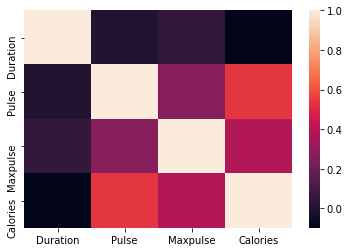

In [50]:
sns.heatmap(df.corr())